### Previously Covered Topics
[Probability Concepts Covered Before](https://github.com/Sumad/DS/blob/master/Stats%20and%20Stat%20Inference/SL101/Probability.md)
- Random Experiment 
- Random Variable 
- Event : Simple / Complex  

[Probability Distributions](https://github.com/Sumad/DS/blob/master/Stats%20and%20Stat%20Inference/SL101/Probability_Distributions.md) 
- Discrete Randon Vars. 
-  Continuous  Random Vars.  
- PDF and Probability Distribution (Binomial, Poisson (Discrete); Normal, T, Chi Square, F (Continuous). 
- Paramters of distributions   
- CLT  

[Hypothesis Testing](https://github.com/Sumad/DS/blob/master/Stats%20and%20Stat%20Inference/SL101/Hypothesis_Testing.md)  

- Design of Hypotheses tests.(Compare same to population, two populations using cont. meausres or categorical meausres). General design follows
  - Defining Null and Alternate Hypotheses. 
  - test statistic/ sampling distribution.  
  - sample size determination. 
  - Evaluate type1/type2 errors, choose significance level. 
  - determine region of test, and compute critical values. or p values or confidence intervals
  - decide to accept/reject null hypothesis

** Good Reference Book - Think Stats **

Example. :   
**Binomial**:
Random variable with two outcomes is called Bernoulli Random Variable. 
When a bernoulli experiment with success prob (p) is repeated, a random variable described 
by no. of successes (r) in n trials is called Binomial Random Variable

In [1]:
import numpy as np

In [4]:
np.random.binomial(n = 5, p = 0.5)  # Sample r from a Bernoulli distribution characterized by n, p

3

#### simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15.

In [24]:
#### 1000 trial, and count no. of successes
random_var = np.random.binomial(n = 20, p = 0.5, size = 10000 ) 
type(random_var)

numpy.ndarray

In [25]:
np.mean(random_var >= 15)
#prob_gt_15 = len([x for x in random_var if x >=15])/10000
#prob_gt_15

0.0224

#### Simulating actual events  
- Computational capabilities can be used to simulate occurence of real event, and work out the math really fast  
- This could be done interestingly for different kinds of probability distributions

##### Example : Probability of observing tornadoes on two consecutive days, given tornado occures once in 100 days

In [26]:
p = 0.01

- Let us create 1000 years, where tornadoes occur each day using the given prob.  
- We can count how many days tornadoes occured on consecutive days in the perid to get the probability

In [42]:
days = np.random.binomial(1,0.01, 1000000)

In [43]:
days[days > 0][0:5]

array([1, 1, 1, 1, 1])

In [46]:
cnt = 0
for i in range(len(days)-1):
    if((days[i]==1) & (days[i+1]==1)):
        cnt+=1
prob = cnt/len(days)    
print("Count of consecutive tornado days in {0:.2f} years is {1}, \n  \
      Probability of tornado occuring on consecutive days would be {2}".format((1000000)/365,cnt, prob))

Count of consecutive tornado days in 2739.73 years is 99, 
        Probability of tornado occuring on consecutive days would be 9.9e-05


### Properties of Probability Distributions , Working with samples pulled from distributions
- Central Tendency (mean, median, mode)
- Variation. (variance, iqr)
- Skew. (0 as reference for normal, +ve and -ve show right and left skew)
- Kurtosis  (0  as refernce for normal)

### Expected Value vs Mean.   
- For random variables, expected value is sum of random variables weighted by their probabilities.  
- Mean is average of sample taken from a distribution, which tends to expected value as sample size increases


In [57]:
from scipy import stats
# Sample from a random normal. 
s = np.random.randn(1000)
print(stats.kurtosis(s))
print(stats.skew(s))


0.37402269105436714
0.06253079810199168


In [51]:
from matplotlib import pyplot as plt 
%matplotlib notebook

#### Although we are looking at at a standard normal random variable, why are kurtosis and skew different than 0? 
- Because these are samples that have been generated, and not the population

<IPython.core.display.Javascript object>


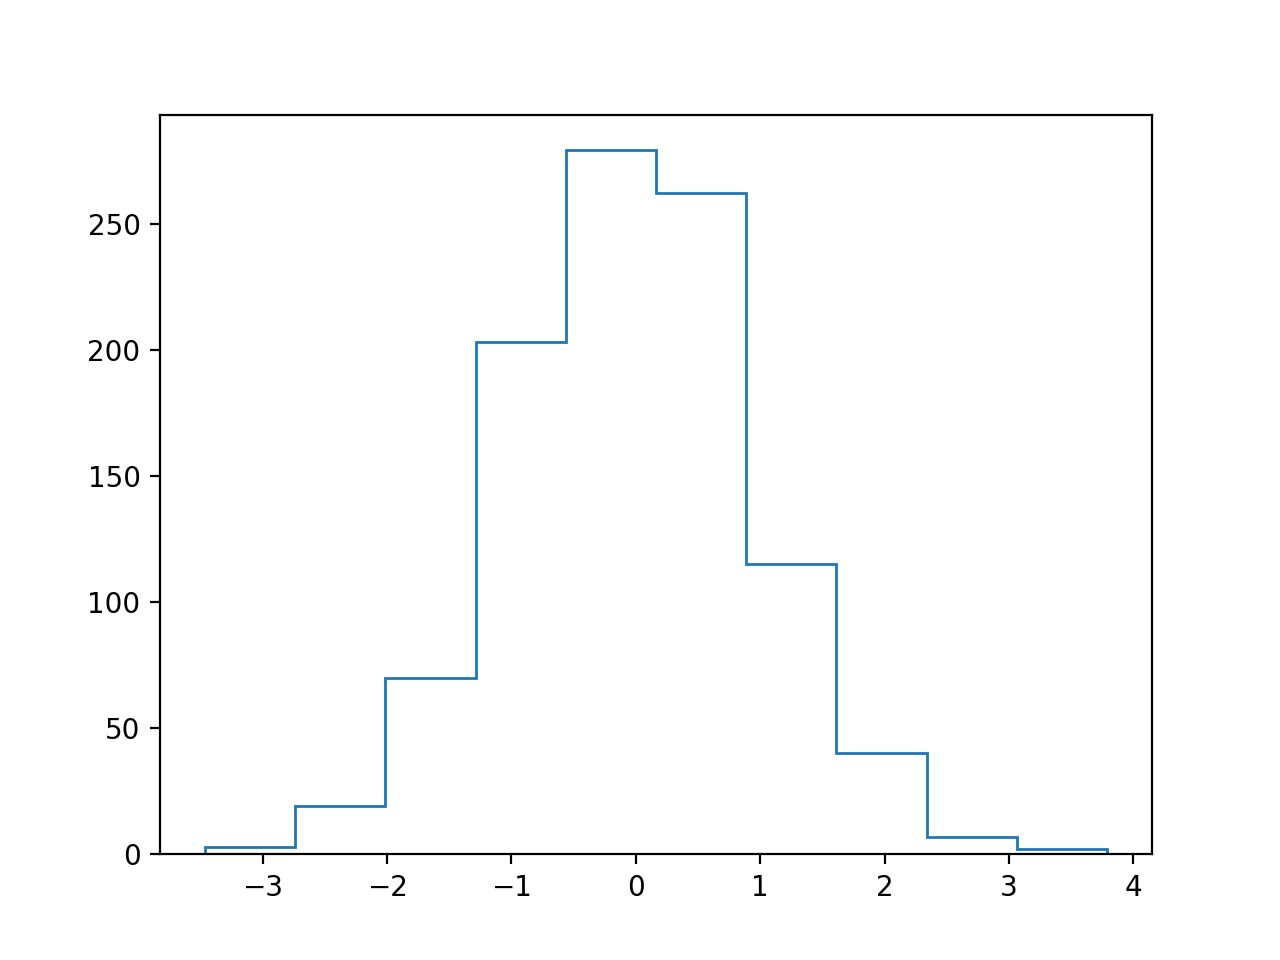

(array([   3.,   19.,   70.,  203.,  279.,  262.,  115.,   40.,    7.,    2.]),
 array([-3.46307478, -2.73804389, -2.01301301, -1.28798213, -0.56295125,
         0.16207964,  0.88711052,  1.6121414 ,  2.33717229,  3.06220317,
         3.78723405]),
 <a list of 1 Patch objects>)

In [58]:
plt.hist(s,histtype= 'step')

### ChiSquare distribution 
- Right skewed, parametrized by degrees of freedom. 
- Square normal random variables when added form this distribution

##### As df increases, right skew decreases

In [67]:
one = np.random.chisquare(df = 5, size = 10000)
two = np.random.chisquare(df = 10, size = 10000)
three = np.random.chisquare(df = 15, size = 10000)
print(stats.skew(one),stats.skew(two), stats.skew(three))

1.233751123925481 0.8339530709387486 0.7276418291088825


<IPython.core.display.Javascript object>


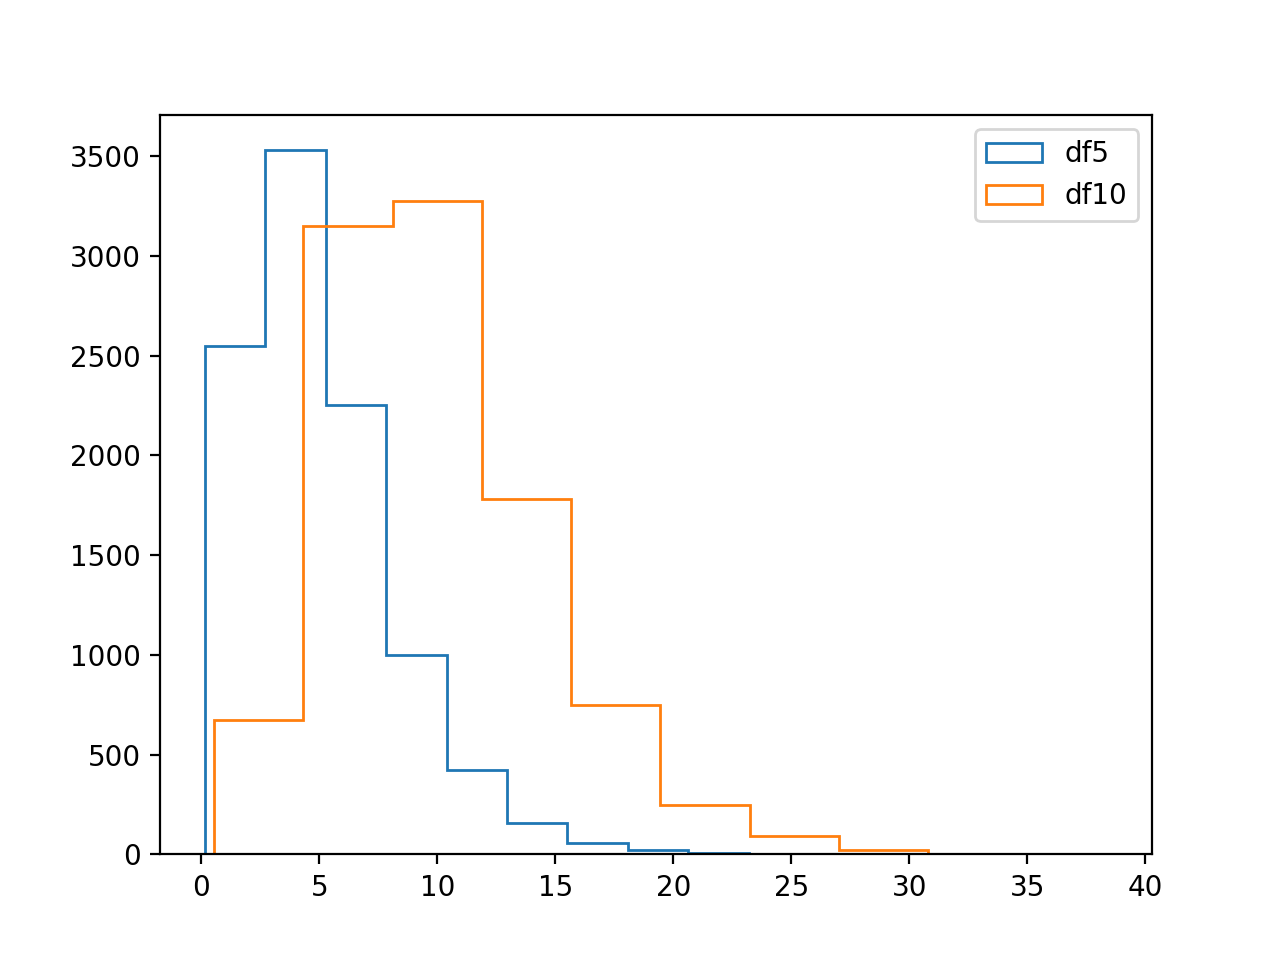

In [66]:
plt.figure()
plt.hist(one, histtype= 'step',label = 'df5')
plt.hist(two,  histtype= 'step',label = 'df10')
#plt.hist(three,  histtype= 'step',label = 'df15')
plt.legend()


#### Hypothesis Test  
- parametric and non-parameric tests 
- parametic tests are based on assumption of distributions (should examine these carefully)
- p-hacking  (doing a series of p test to get a chance p value that is low)
  - Bonferoni Correction. : if you plan to do n tests, correct p values as alpha/n. 
  - Hold out data 
  - Pre Registration

In [2]:
import os
import pandas as pd
% cd ..
df = pd.read_csv(os.getcwd() + '/' + 'grades.csv')

/Users/sumad/Documents/DS/Python/UM Spcialization/DS_with_Python


### Compare early and late group of students to see if performance differed significantly

In [5]:
grp1 = df.iloc[0:1000,]
grp2 = df.iloc[1000:,]

In [6]:
grp1.mean()

assignment1_grade    74.398534
assignment2_grade    66.972925
assignment3_grade    60.662696
assignment4_grade    54.275338
assignment5_grade    48.808816
assignment6_grade    44.201823
dtype: float64

In [7]:
grp2.mean()

assignment1_grade    74.640065
assignment2_grade    66.754773
assignment3_grade    60.593160
assignment4_grade    53.987986
assignment5_grade    48.473812
assignment6_grade    43.567406
dtype: float64

##### Is there a stat. difference in performance   
- independent t test: comparison of assignment wise means 
- test design
  - Null Hyp : Grades are same. 
  - Alt Hyp : Grades are diff. 
  - Test stat = t test, as we do not know pop. sd 
  - sample size ~ 1000. 
  - Assumption : Both populations are normally distributed and have same variances  
  - alpha : 5% , two tailed test

In [8]:
from scipy import stats 

In [14]:
for i in range(1,7):
    test = 'assignment'+ str(i)+'_grade'
    print(stats.ttest_ind(grp1[test], grp2[test]), '\n')  # this is a two tailed test, assumes equal variances 
    # of population, see documentation

Ttest_indResult(statistic=-0.35194409250958597, pvalue=0.72491225136623927) 

Ttest_indResult(statistic=0.32572452495685433, pvalue=0.74466225053734414) 

Ttest_indResult(statistic=0.10694989891789454, pvalue=0.91483800162002826) 

Ttest_indResult(statistic=0.46621056423777313, pvalue=0.64110868958846545) 

Ttest_indResult(statistic=0.57321059134709273, pvalue=0.5665578356070704) 

Ttest_indResult(statistic=1.1404235956932716, pvalue=0.25422793752352363) 



In [15]:
for i in range(1,7):
    test = 'assignment'+ str(i)+'_grade'
    print(stats.ttest_ind(grp1[test], grp2[test],equal_var= False), '\n')  # Welch's t test

Ttest_indResult(statistic=-0.35107421929149024, pvalue=0.72556738270087284) 

Ttest_indResult(statistic=0.32387643434262592, pvalue=0.74606379157163705) 

Ttest_indResult(statistic=0.10651720165085073, pvalue=0.91518209996211075) 

Ttest_indResult(statistic=0.46345099845327586, pvalue=0.64308913894621644) 

Ttest_indResult(statistic=0.5711487821277994, pvalue=0.56795930656217841) 

Ttest_indResult(statistic=1.1365415390673337, pvalue=0.25585828958975204) 

